In [59]:
%matplotlib inline
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
from sklearn.feature_extraction.text import CountVectorizer
from numpy.linalg import norm
np.random.seed(0)
import seaborn as sns
import random as rd
import csv
import random
import math
import operator
import copy
import os,os.path

In [60]:
def findtrainsubset(data,drop_size):
    if isinstance(drop_size,float):
        drop_size=round(drop_size * len(data))
    indices = data.index.tolist()
    drop_indices = random.sample(population=indices,k=drop_size)
    train_subdata = data.drop(drop_indices)
    return train_subdata

In [61]:
path = 'E:\\SMAI_A2\\Q6\\Question-6\\dataset'
f_names = os.listdir(path)
corpus = []
for filename in f_names:
    filepath=path + "\\" + filename
    file = open(filepath,"r")
    str=file.read()
    corpus.append(str)

In [62]:
print(len(corpus))

1725


In [63]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X=X.toarray()
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]]


# K-Mean Clustering Algorithm

In [64]:
class Kmeans:
    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))

    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)

    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [65]:
km = Kmeans(n_clusters=5, max_iter=100)
km.fit(X)    

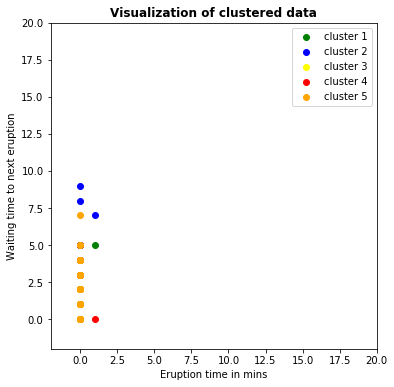

In [66]:
centroids = km.centroids
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X[km.labels == 0, 0], X[km.labels == 0, 1],c='green', label='cluster 1')
plt.scatter(X[km.labels == 1, 0], X[km.labels == 1, 1],c='blue', label='cluster 2')
plt.scatter(X[km.labels == 2, 0], X[km.labels == 2, 1],c='yellow', label='cluster 3')
plt.scatter(X[km.labels == 3, 0], X[km.labels == 3, 1],c='red', label='cluster 4')
plt.scatter(X[km.labels == 4, 0], X[km.labels == 4, 1],c='orange', label='cluster 5')
#plt.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], centroids[:, 3], centroids[:, 4], marker='*', s=300,c='r', label='centroid')
plt.legend()
plt.xlim([-2, 20])
plt.ylim([-2, 20])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [67]:
Predicted_labels = km.predict(X)

In [68]:
print(Predicted_labels)

[1 4 4 ... 1 4 1]


In [69]:
Actual_labels = []
for file_name in f_names:
    for i in range(len(file_name)):
        if(file_name[i]=='_'):
            Actual_labels.append(int(file_name[i+1]))

In [72]:
match_cnt=0
for i in range(len(Actual_labels)):
    if(Actual_labels[i]==Predicted_labels[i]+1):
        match_cnt+=1
Accuracy=match_cnt/len(Actual_labels)
print(Accuracy)

0.10376811594202899


In [17]:
(1/len(X)) * km.error

810.6214187367854

# Standardization of Training Dataset Improved preprocess

In [73]:
X=(X-X.mean())/X.std()

In [74]:
o_km = Kmeans(n_clusters=5, max_iter=50)
o_km.fit(X) 

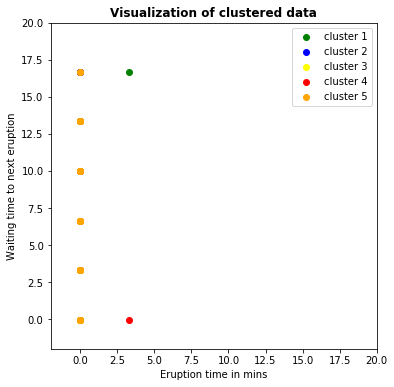

In [75]:
centroids = km.centroids
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X[km.labels == 0, 0], X[km.labels == 0, 1],c='green', label='cluster 1')
plt.scatter(X[km.labels == 1, 0], X[km.labels == 1, 1],c='blue', label='cluster 2')
plt.scatter(X[km.labels == 2, 0], X[km.labels == 2, 1],c='yellow', label='cluster 3')
plt.scatter(X[km.labels == 3, 0], X[km.labels == 3, 1],c='red', label='cluster 4')
plt.scatter(X[km.labels == 4, 0], X[km.labels == 4, 1],c='orange', label='cluster 5')
plt.legend()
plt.xlim([-2, 20])
plt.ylim([-2, 20])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [76]:
n_Predicted_labels = km.predict(X)

In [78]:
n_Actual_labels = []
for file_name in f_names:
    for i in range(len(file_name)):
        if(file_name[i]=='_'):
            n_Actual_labels.append(int(file_name[i+1]))

In [79]:
match_cnt=0
for i in range(len(Actual_labels)):
    if(n_Actual_labels[i]==n_Predicted_labels[i]+1):
        match_cnt+=1
Accuracy=match_cnt/len(n_Actual_labels)
print(Accuracy)

0.20579710144927535


# Dimensionality Reduction 

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [81]:
X=pca.transform(X)

In [82]:
no_km = Kmeans(n_clusters=5, max_iter=100)
no_km.fit(X) 

In [83]:
nn_Predicted_labels = no_km.predict(X)

In [85]:
nn_Actual_labels = []
for file_name in f_names:
    for i in range(len(file_name)):
        if(file_name[i]=='_'):
            nn_Actual_labels.append(int(file_name[i+1]))

In [86]:
match_cnt=0
for i in range(len(Actual_labels)):
    if(nn_Actual_labels[i]==nn_Predicted_labels[i]+1):
        match_cnt+=1
Accuracy=match_cnt/len(nn_Actual_labels)
print(Accuracy)

0.3426086956521739


# Observation: Accuracy from 10% to 20% by standardization of traindata and from 20% to 34.26% by dimensionality reduction here number of K =5 which is fixed.